In [29]:
# Importing necessary libraries for data analysis and visualization
import pandas as pd  # Pandas for data manipulation
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for data visualization
import seaborn as sns  # Seaborn for statistical data visualization
from folium.plugins import HeatMap  # Folium for creating heat maps
import ipywidgets as widgets  # Ipywidgets for interactive widgets in Jupyter Notebook
from IPython.display import display  # Display module for output visualization


# This script analyzes the following variables: 
# - T2M_MAX: Maximum temperature
# - TS: Surface temperature
# - T2M_MIN: Minimum temperature

In [ ]:
df = pd.read_csv(r"D:\\project Fainal\sorted_data_large\sorted_data_large.csv")

In [30]:
# Displaying the column names of the DataFrame
df.columns

Index(['Unnamed: 0', 'LAT', 'LON', 'YEAR', 'DOY', 'EVLAND', 'GWETPROF',
       'GWETROOT', 'GWETTOP', 'PRECSNO', 'PRECTOTCORR', 'QV2M', 'RH2M', 'RHOA',
       'T10M', 'T10M_MAX', 'T10M_MIN', 'T2M', 'T2M_MAX', 'T2M_MIN', 'TO3',
       'TS', 'TSOIL1', 'TSOIL2', 'TSOIL3', 'TSOIL4', 'TSOIL5', 'TSOIL6',
       'TS_MAX', 'TS_MIN', 'WD2M', 'WD50M', 'WS2M', 'WS2M_MAX', 'WS2M_MIN',
       'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'Z0M'],
      dtype='object')

In [31]:
# Selecting relevant columns for analysis

df1=df[['LAT','LON','YEAR','DOY','T2M_MAX','TS','T2M_MIN']]

In [ ]:
df1

,LAT,LON,YEAR,DOY,T2M_MAX,TS,T2M_MIN
0,22.5,25.625,2019,1,14.83,8.96,3.43
1,22.5,26.250,2019,1,17.26,10.54,4.39
2,22.5,26.875,2019,1,18.91,11.85,5.14
3,22.5,27.500,2019,1,19.51,12.56,6.18
4,22.5,28.125,2019,1,19.77,12.80,6.36
...,...,...,...,...,...,...,...
503971,31.0,33.125,2023,365,20.07,16.84,14.73
503972,31.5,25.625,2023,365,19.91,15.94,13.15
503973,31.5,26.250,2023,365,19.36,16.62,14.17
503974,31.5,30.625,2023,365,19.42,18.79,16.32


In [32]:
# Generating summary statistics for the selected columns
df1.describe()

,LAT,LON,YEAR,DOY,T2M_MAX,TS,T2M_MIN
count,503976.000000,503976.000000,503976.000000,503976.000000,503976.000000,503976.000000,503976.000000
mean,26.692029,29.938859,2020.999452,183.100219,30.213329,23.962220,15.967068
std,2.694820,2.821385,1.414021,105.424248,8.074421,8.329484,7.056959
min,22.500000,25.000000,2019.000000,1.000000,6.470000,2.210000,-3.460000
25%,24.500000,27.500000,2020.000000,92.000000,23.310000,16.460000,9.850000
50%,26.500000,30.000000,2021.000000,183.000000,31.100000,24.860000,16.660000
75%,29.000000,32.500000,2022.000000,274.000000,37.060000,31.210000,22.000000
max,31.500000,36.250000,2023.000000,366.000000,49.260000,43.610000,34.230000


In [ ]:
# Grouping data by YEAR and calculating mean, min, and max for temperature-related columns
df1.groupby('YEAR')[['T2M_MIN', 'T2M_MAX', 'TS']].agg(['mean', 'min', 'max'])

T2M_MIN                 T2M_MAX                      TS             
           mean   min    max       mean   min    max       mean   min    max
YEAR                                                                        
2019  15.922518 -2.50  33.30  30.196840  8.92  48.40  23.951535  3.85  43.40
2020  15.708690 -1.83  32.78  29.915839  8.24  49.02  23.738928  4.44  43.61
2021  16.063480 -1.63  33.83  30.574776  6.47  47.65  24.124679  4.47  42.44
2022  15.581033 -3.46  32.73  29.697600  7.22  47.66  23.509108  2.21  42.41
2023  16.560328 -1.03  34.23  30.682407  9.03  49.26  24.487462  4.85  42.47

In [33]:
# Sorting data by YEAR in ascending order
df1=df1.sort_values('YEAR')


In [34]:
# Displaying summary statistics for T2M_MIN and T2M_MAX columns
df[['T2M_MIN', 'T2M_MAX']].describe()


,T2M_MIN,T2M_MAX
count,503976.000000,503976.000000
mean,15.967068,30.213329
std,7.056959,8.074421
min,-3.460000,6.470000
25%,9.850000,23.310000
50%,16.660000,31.100000
75%,22.000000,37.060000
max,34.230000,49.260000


In [36]:
import folium


In [35]:
# Creating a base map centered on Egypt (latitude: 26.8206, longitude: 30.8025)
map_center = [26.8206, 30.8025]  
my_map = folium.Map(location=map_center, zoom_start=6)


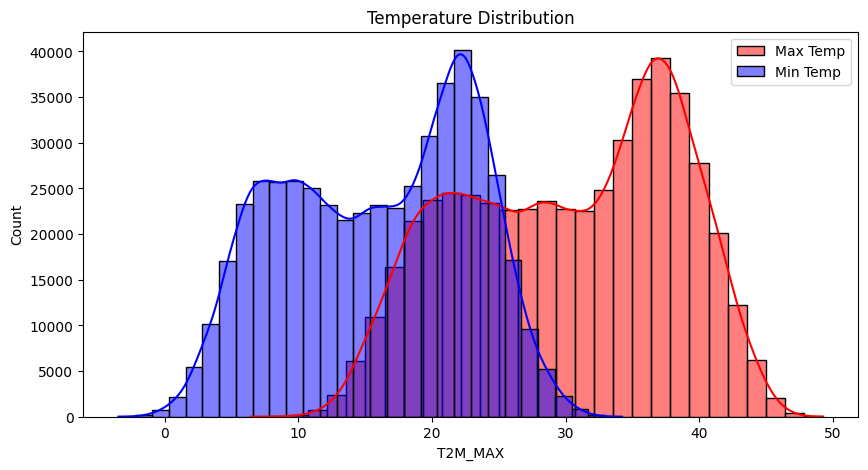

In [ ]:
# Plotting temperature distribution using histograms
plt.figure(figsize=(10, 5))  # Setting figure size
sns.histplot(df['T2M_MAX'], bins=30, kde=True, color="red", label="Max Temp")  # Histogram for max temperature
sns.histplot(df['T2M_MIN'], bins=30, kde=True, color="blue", label="Min Temp")  # Histogram for min temperature
plt.legend()  # Adding legend
plt.title("Temperature Distribution")  # Setting plot title
plt.show()  # Displaying the plot

In [ ]:
# Dropping rows with missing values in LAT, LON, and T2M_MAX columns
df = df.dropna(subset=['LAT', 'LON', 'T2M_MAX'])  

# Reducing the number of points if the dataset is too large (optional)
df_sample = df.sample(n=5000) if len(df) > 5000 else df  # Sampling 5000 points if the dataset is large  

# Creating an interactive map centered on the mean location of the dataset
m = folium.Map(location=[df_sample['LAT'].mean(), df_sample['LON'].mean()], zoom_start=5)  

# Preparing heatmap data (latitude, longitude, and temperature values)
heat_data = list(zip(df_sample['LAT'], df_sample['LON'], df_sample['T2M_MAX']))  

# Adding the heatmap layer to the map
HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(m)

# The heatmap shows the geographic distribution of data in Egypt, where warm colors (yellow and green) represent high-density areas, while cool colors (blue) indicate #lower-density regions. The data could be related to temperature, the number of users, or any other geographic variable. The goal of the analysis is to understand spatial #         patterns and identify any unusual data distributions.









In [ ]:
m

# -- Plotting a bar chart to visualize mean temperatures  
# -- Red bar represents the Mean Max Temperature (30.21°C)  
# -- Blue bar represents the Mean Min Temperature (15.97°C)  
# -- Y-axis shows the temperature values in °C  
#  --X-axis contains two categories: "Mean Max Temperature" & "Mean Min Temperature"  
# -- Title: "Mean Temperature Report" to describe the chart  


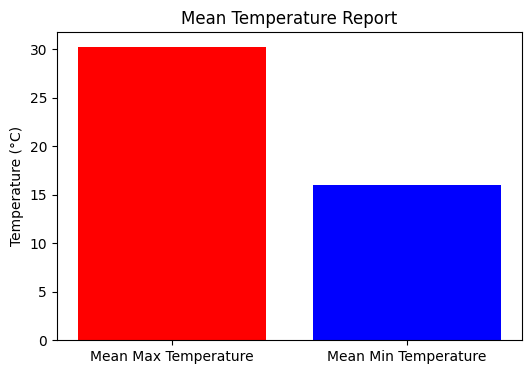

In [ ]:
categories = ["Mean Max Temperature", "Mean Min Temperature"]
values = [30.21, 15.97]

plt.figure(figsize=(6,4))
plt.bar(categories, values, color=['red', 'blue'])
plt.ylabel("Temperature (°C)")
plt.title("Mean Temperature Report")
plt.show()